In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [33]:
mgard_single = pd.read_csv('./bench_20230919_184001_single.txt')
zlib_single = pd.read_csv('./bench_20230921_153911_timestep_0_lossless_single.txt')

In [34]:
mgard_single["comp_bw"] = mgard_single["comp_throughput"]/1024/1024
mgard_single["decomp_bw"] = mgard_single["decomp_throughput"]/1024/1024
mgard_single["OriginalMB"] = mgard_single["OriginalSizeInByte"]/1024/1024
mgard_single["CompressedMB"] = mgard_single["CompressedSizeInByte"]/1024/1024
mgard_single.drop(["decomp_throughput","comp_throughput"],axis=1)

zlib_single["comp_bw"] = zlib_single["comp_throughput"]/1024/1024
zlib_single["decomp_bw"] = zlib_single["decomp_throughput"]/1024/1024
zlib_single["OriginalMB"] = zlib_single["OriginalSizeInByte"]/1024/1024
zlib_single["CompressedMB"] = zlib_single["CompressedSizeInByte"]/1024/1024
zlib_single.drop(["decomp_throughput","comp_throughput"],axis=1)

,OriginalSizeInByte,CompressedSizeInByte,CompRatio,avg_load_time,std_dev_load_time,load_throughput,avg_comp_time,std_dev_comp_time,avg_decomp_time,std_dev_decomp_time,comp_bw,decomp_bw,OriginalMB,CompressedMB
0,1048576,922814,1.136281,0.610380,0.0,1.717906e+06,0.203126,0.178317,0.240775,0.328516,4.923056,4.153251,1.0,0.880064
1,2097152,1890239,1.109464,0.029191,0.0,7.184179e+07,0.158944,0.000775,0.017341,0.000057,12.583038,115.333749,2.0,1.802672
2,4194304,3796874,1.104673,0.040015,0.0,1.048183e+08,0.314451,0.000654,0.034839,0.000020,12.720590,114.815448,4.0,3.620981
3,8388608,7513522,1.116468,0.058579,0.0,1.432023e+08,0.635927,0.000701,0.072758,0.004692,12.580063,109.953366,8.0,7.165453
4,16777216,15203472,1.103512,0.085720,0.0,1.957210e+08,1.343166,0.005542,0.155491,0.014353,11.912155,102.900087,16.0,14.499161
5,33554432,30410042,1.103400,0.264543,0.0,1.268392e+08,2.834038,0.152290,0.310113,0.015049,11.291310,103.188102,32.0,29.001276
6,67108864,60271282,1.113447,0.368218,0.0,1.822530e+08,5.740732,0.289185,0.641006,0.017334,11.148404,99.842986,64.0,57.479174
7,134217728,121208674,1.107328,0.392254,0.0,3.421704e+08,11.389851,0.209226,1.324228,0.016944,11.238075,96.660077,128.0,115.593599
8,268435456,241940315,1.109511,0.694224,0.0,3.866700e+08,22.613595,0.146998,2.688063,0.062289,11.320623,95.235866,256.0,230.732265
9,536870912,482163509,1.113462,1.200132,0.0,4.473433e+08,46.692553,0.710334,5.289155,0.003821,10.965346,96.801858,512.0,459.826955


1.1097523390015376


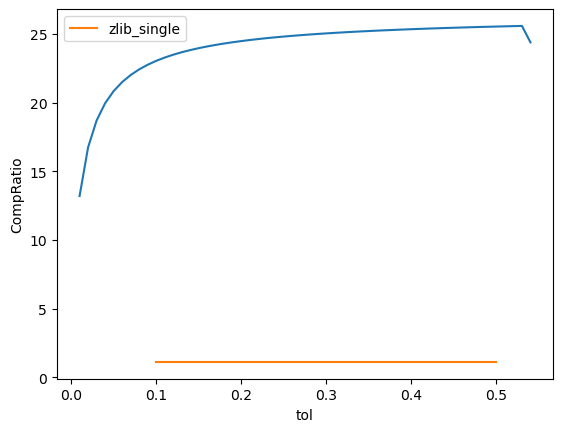

In [35]:
# Group the data by 'tol'
grouped_data = mgard_single.groupby('tol')
CompRatio = grouped_data.agg({"CompRatio":"mean"})
plt.plot(CompRatio.index,CompRatio["CompRatio"])

print(zlib_single["CompRatio"].mean())
# for zlib
v_tol = [tol for tol in np.arange(0.1, 0.6, 0.1)]

zlib_compratio = [zlib_single["CompRatio"].mean()]*5
plt.plot(v_tol,zlib_compratio,label="zlib_single")
plt.xlabel("tol")
plt.ylabel("CompRatio")
plt.legend()
plt.show()

In [36]:
def comp_ratio(tol):
    return np.interp(tol,CompRatio.index,CompRatio["CompRatio"])

test = comp_ratio(0.00001)
print(test)

13.192931558269702


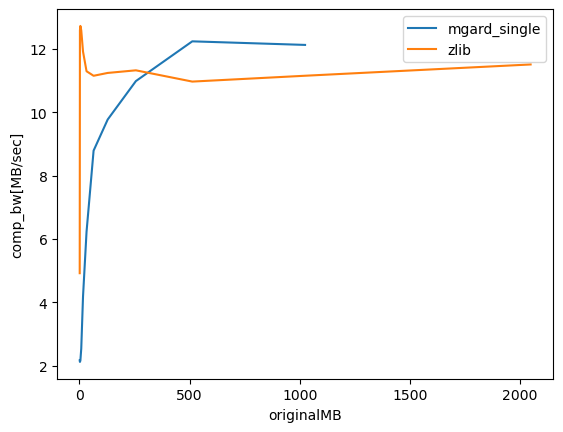

In [37]:
# こっちもinterpolarationをした方がいい気がしてきた
grouped_data = mgard_single.groupby("OriginalMB")
comp_mean = grouped_data.agg({'comp_bw':'mean'})
observed_comp_bw = comp_mean
observed_Ori_mb = comp_mean.index
plt.plot(observed_Ori_mb,observed_comp_bw,label="mgard_single")
plt.xlabel("originalMB")
plt.ylabel("comp_bw[MB/sec]")
plt.plot(zlib_single["OriginalMB"],zlib_single["comp_bw"],label="zlib")
plt.legend()
plt.show()

In [60]:
def single_comp_bw(orisize):
    return np.interp(orisize, comp_mean.index, comp_mean["comp_bw"])

test = single_comp_bw(1000)
print(test)

12.12694808060409


In [61]:
def zlib_comp_bw(orisize):
    return np.interp(orisize, zlib_single["OriginalMB"], zlib_single["comp_bw"])

test = zlib_comp_bw(1000)
print(test)

11.140888234430879


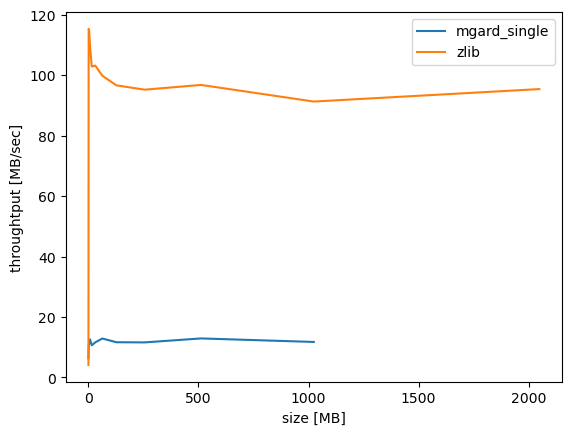

In [62]:
grouped_data = mgard_single.groupby("OriginalMB")
decomp_mean = grouped_data.agg({'decomp_bw':'mean'})
plt.plot(decomp_mean.index,decomp_mean["decomp_bw"],label="mgard_single")
plt.plot(zlib_single["OriginalMB"],zlib_single["decomp_bw"],label="zlib")
plt.xlabel("size [MB]")
plt.ylabel("throughtput [MB/sec]")

plt.legend()
plt.show()

In [63]:
def single_decomp_bw(orisize):
    return np.interp(orisize,decomp_mean.index,decomp_mean["decomp_bw"])
test = single_decomp_bw(1000)
print(test)

11.808362310064688


In [64]:
def zlib_decomp_bw(orisize):
    return np.interp(orisize,zlib_single["OriginalMB"],zlib_single["decomp_bw"])
test = zlib_decomp_bw(1000)
print(test)

91.56006723561543


In [67]:
nvmeBw = 2000 # MB
NetBw = 125 # MB

def MGARD_single_Latency(tol,OriSize):
    d = {}
    d["total_time"] = OriSize/nvmeBw + OriSize/single_comp_bw(OriSize) + OriSize/comp_ratio(tol)/NetBw + OriSize/single_decomp_bw(OriSize)
    d["load_time"] =  OriSize/nvmeBw
    d["transfer_time"] = OriSize/comp_ratio(tol)/NetBw
    d["comp_time"] =  OriSize/single_comp_bw(OriSize)
    d["decomp_time"] = OriSize/single_decomp_bw(OriSize)
    d["device"] = "mgard_single"
    return d

def zlib_single_Latency(OriSize):
    d = {}
    zlib_comp_ratio = 1.1
    d["total_time"] = OriSize/nvmeBw + OriSize/zlib_comp_bw(OriSize) + OriSize/zlib_comp_ratio/NetBw + OriSize/zlib_decomp_bw(OriSize)
    d["load_time"] =  OriSize/nvmeBw
    d["transfer_time"] = OriSize/zlib_comp_ratio/NetBw
    d["comp_time"] =  OriSize/zlib_comp_bw(OriSize)
    d["decomp_time"] = OriSize/zlib_decomp_bw(OriSize)
    d["device"] = "zlib_single"
    return d

In [68]:
import pandas as pd

# Initialize an empty DataFrame
Latency_df = pd.DataFrame(columns=['tol', 'OriSizeMB', 'l'])

# Create a list to store dictionaries for each row
data = []

# reduced 
tols = [0, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.5]

# Loop through the desired range of 'tol' and 'OriSize'
for tol in tols:  # Adjust the range as needed

    for OriSize in range(0, 4000, 100):
        
        if tol == 0:
            d = zlib_single_Latency(OriSize)
            row_dict = {'tol': tol, 
                'OriSize': OriSize, 
                'total_latency': d["total_time"],
                'load_time' : d["load_time"],
                'transfer_time' : d["transfer_time"],
                'comp_time':d["comp_time"],
                'decomp_time':d["decomp_time"],
                'device' : d["device"]
                }
            # Append the dictionary to the list
            data.append(row_dict)
            
        else:
            if OriSize == 0:
                continue
            d = MGARD_single_Latency(tol, OriSize)  # Convert 'tol' to float
            # Create a dictionary for the current row
            row_dict = {'tol': tol, 
                        'OriSize': OriSize, 
                        'total_latency': d["total_time"],
                        'load_time' : d["load_time"],
                        'transfer_time' : d["transfer_time"],
                        'comp_time':d["comp_time"],
                        'decomp_time':d["decomp_time"],
                        'device' : d["device"]
                        }
            # Append the dictionary to the list
            data.append(row_dict)
        


# Convert the list of dictionaries into a DataFrame
Latency_df = pd.DataFrame(data)

# Display the resulting DataFrame
print(Latency_df)


     tol  OriSize  total_latency  load_time  transfer_time   comp_time  \
0    0.0        0       0.000000       0.00       0.000000    0.000000   
1    0.0      100      10.726626       0.05       0.727273    8.929493   
2    0.0      200      21.364356       0.10       1.454545   17.723412   
3    0.0      300      32.117039       0.15       2.181818   26.644025   
4    0.0      400      43.239398       0.20       2.909091   35.968701   
..   ...      ...            ...        ...            ...         ...   
503  0.5     3500     589.362002       1.75       1.096116  288.739256   
504  0.5     3600     606.200917       1.80       1.127433  296.988949   
505  0.5     3700     623.039831       1.85       1.158751  305.238642   
506  0.5     3800     639.878746       1.90       1.190069  313.488335   
507  0.5     3900     656.717660       1.95       1.221386  321.738028   

     decomp_time        device  
0       0.000000   zlib_single  
1       1.019861   zlib_single  
2       2.08

In [69]:
Latency_df.to_csv("./Latency_0921_single_reduced.csv",index=False)